In [52]:
import pandas as pd
import numpy as np
import seaborn as sns

# data 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 경고문 제거
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [26]:
from sklearn.preprocessing import StandardScaler

In [7]:
df_process_raw = pd.read_csv("/home/piai/바탕화면/bat_process.csv", encoding="euc-kr")
df_tat_raw = pd.read_csv("/home/piai/바탕화면/bat_tat.csv", encoding="euc-kr")

In [18]:
df_process_raw

,lot_id,tray_id,dt_start,cell_id,judge,rta1_cell_no,rta1_box_col,rta1_box_row,rta1_box_dan,hta1_box_col,...,sa3_box_row,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,양품,10,08열,33연,08단,03열,...,37연,04단,3759.3,5,6.8,4718,37583,94,565,164
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,양품,7,08열,33연,08단,03열,...,37연,04단,3758.4,5,6.8,4718,37574,94,565,73
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,양품,19,08열,33연,08단,03열,...,37연,04단,3759,5.1,6.9,4700,37579,91,585,-57
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,양품,24,08열,33연,08단,03열,...,37연,04단,3759.5,5.1,6.9,4688,37583,93,606,99
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,양품,17,08열,33연,08단,03열,...,37연,04단,3758.2,5,6.8,4696,37570,91,605,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43749,LOT-144,TRAY-2791,12-17-2021 오후 6:33:15,CELL-53649,양품,16,08열,21연,03단,02열,...,16연,13단,3759.2,5.3,7.2,4745,37583,94,643,-35
43750,LOT-144,TRAY-2791,12-17-2021 오후 6:33:15,CELL-53650,양품,14,08열,21연,03단,02열,...,16연,13단,3759.2,5.3,7.1,4746,37583,94,620,89
43751,LOT-144,TRAY-2791,12-17-2021 오후 6:33:15,CELL-53651,양품,2,08열,21연,03단,02열,...,16연,13단,3760.3,5.2,7.0,4782,37595,92,597,-23
43752,LOT-144,TRAY-2791,12-17-2021 오후 6:33:15,CELL-54355,양품,15,08열,21연,03단,02열,...,16연,13단,3760.0,5.3,7.0,4751,37590,95,620,3


# 결측치 제거

In [62]:
df_process_raw.replace('.', 'NaN')
df_process_raw.dropna(inplace=True)

# 이상치 제거 방법 양품과 불량의 군집분석

In [15]:
df_tat_raw.iloc[0:43754,4:-1]

,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,c2_tat,dc2_tat,c3_tat,dc3_tat,c4_tat,ocv2_tat,pg1_tat,pc1_tat,sa1_tat,socv1_tat,sa2_tat,socv2_tat,sa3_tat,socv3_tat
0,217066,86461,5732,119,3556,404,466,404,1797,3884,3428,118,290,290,53500,5,355357,5,215150,5
1,217066,86461,5732,119,3556,404,466,404,1797,3884,3428,118,290,290,53500,5,355357,5,215150,5
2,217066,86461,5732,118,3556,405,466,404,1797,3884,3428,118,290,290,53500,5,355357,5,215150,5
3,217066,86461,5732,118,3556,405,466,404,1797,3884,3428,118,290,290,53501,5,355357,5,215150,5
4,217066,86461,5732,119,3556,404,466,404,1797,3884,3428,118,290,290,53500,5,355357,5,215150,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43749,152836,87334,156490,118,3553,405,451,405,1854,3888,3462,118,290,291,43419,4,345062,5,215255,5
43750,152836,87334,156490,118,3553,405,451,405,1854,3888,3462,118,290,291,43419,4,345062,5,215255,5
43751,152836,87334,156490,118,3553,405,451,405,1854,3888,3462,118,290,291,43419,4,345062,5,215255,5
43752,152836,87334,156490,118,3553,405,451,405,1854,3888,3462,118,290,291,43419,4,345062,5,215255,5


# 이상치 제거 방법 사전조사 지식을 활용

## OCV1

### Histogram

(array([1.0000e+00, 2.0000e+00, 7.0000e+00, 5.7000e+01, 7.0240e+03,
        2.7562e+04, 6.8500e+03, 2.1950e+03, 2.3000e+01, 6.0000e+00]),
 array([3269., 3281., 3293., 3305., 3317., 3329., 3341., 3353., 3365.,
        3377., 3389.]),
 <BarContainer object of 10 artists>)

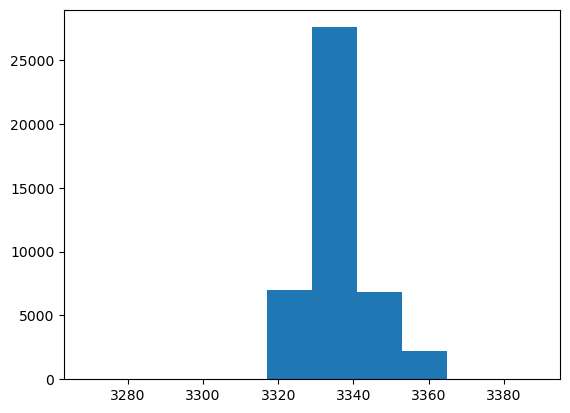

In [63]:
plt.hist(df_process_raw["ocv1_ocv"])

### Boxplot

In [156]:
df_process_ocv1 = df_process_raw[["ocv1_ocv"]]

x_cols = df_process_ocv1.columns

scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_process_ocv1)

# 변환된 데이터 및 형태 확인
print("Scaled Data: \n {}".format(nd_scaled[:5].round(3)))
print("Shape: \n {}".format(nd_scaled.shape))

Scaled Data: 
 [[-0.302]
 [-0.821]
 [-0.821]
 [-0.691]
 [-0.691]]
Shape: 
 (43727, 1)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f73f5cd5b80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f73f60ea100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f73f5cd5d00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f73f60eabe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f73f60ea6d0>],
 'means': []}

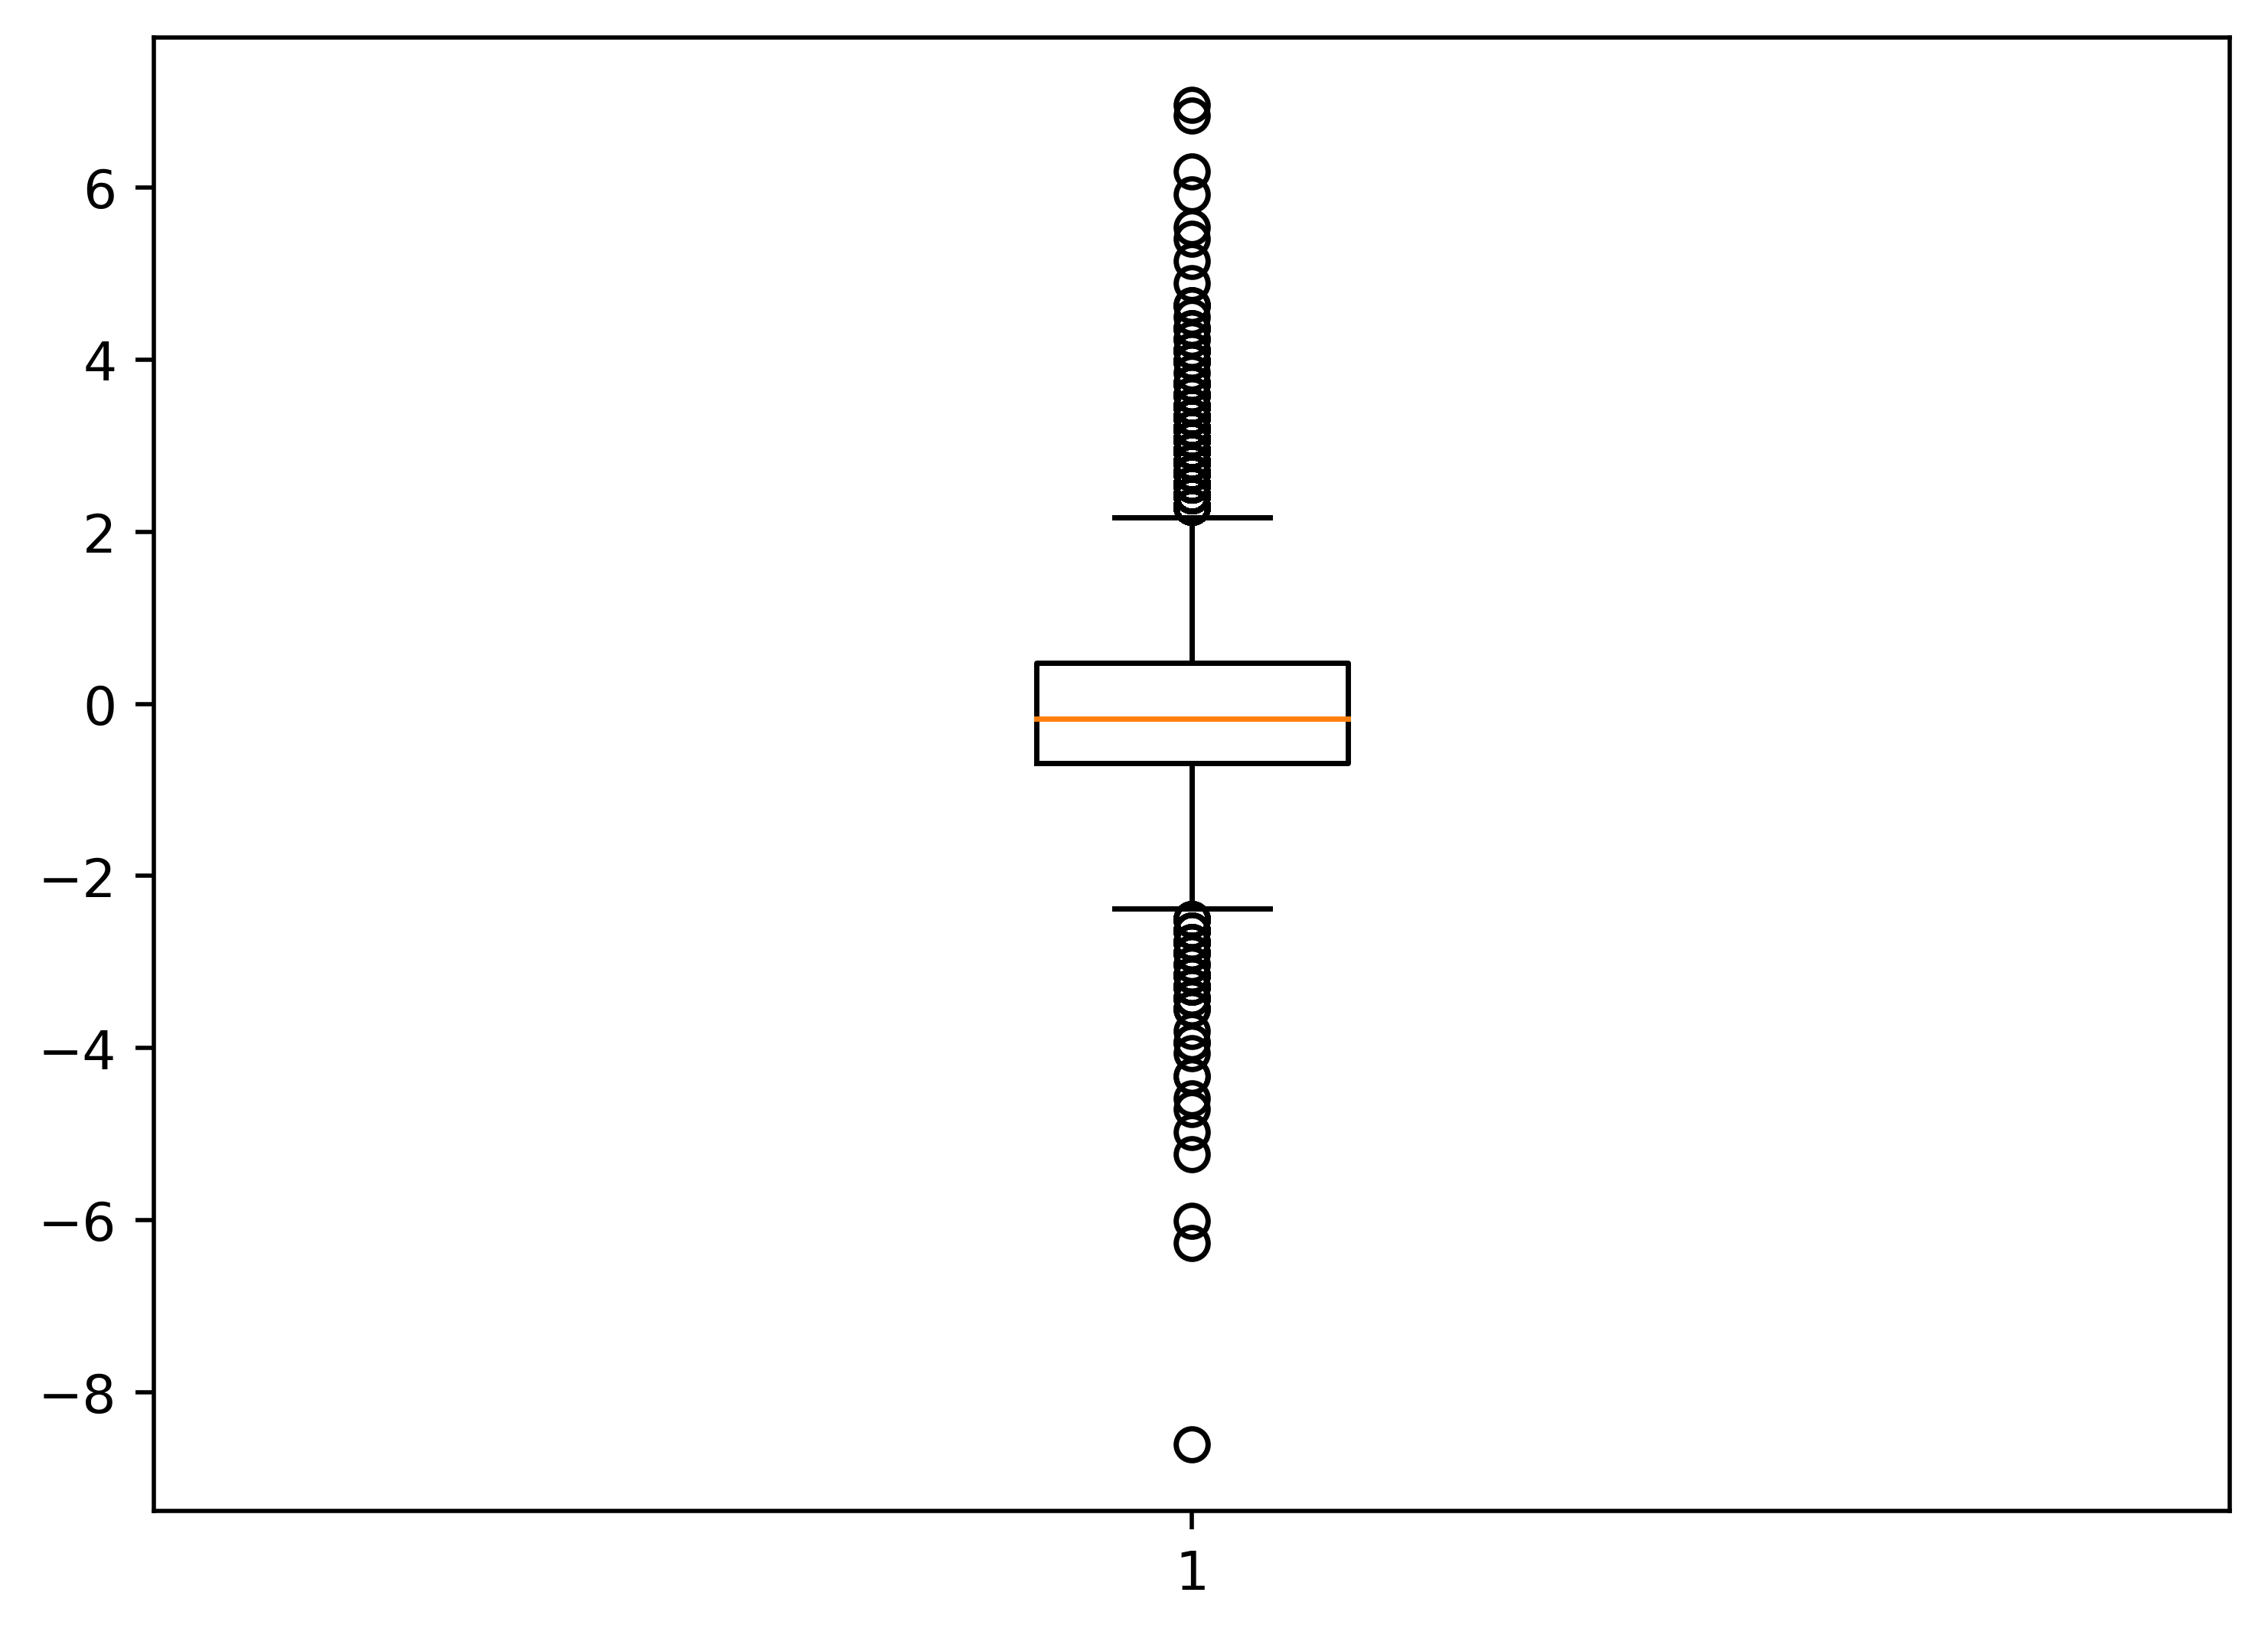

In [157]:
plt.boxplot(nd_scaled)

### 정규분포

In [158]:
df_process_raw["ocv1_ocv"]

0        3333
1        3329
2        3329
3        3330
4        3330
         ... 
43749    3320
43750    3322
43751    3329
43752    3325
43753    3321
Name: ocv1_ocv, Length: 43727, dtype: int64

In [159]:
# OCV1의 분포 곡선에서 0.95 외부의 값들의 범위를 찾는다.
# OCV1의 평균
mean = np.mean(df_process_raw["ocv1_ocv"])
# OCV1의 표준편차
std = np.std(df_process_raw["ocv1_ocv"])
# 3표준편차 범위
line_up = mean + 3*std
line_down = mean - 3*std

In [160]:
df_process_raw[df_process_raw["ocv1_ocv"] > line_up]

,lot_id,tray_id,dt_start,cell_id,judge,rta1_cell_no,rta1_box_col,rta1_box_row,rta1_box_dan,hta1_box_col,...,sa3_box_row,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an
5611,LOT-105,TRAY-1220,12-03-2021 오전 6:08:05,CELL-15283,양품,7,03열,10연,04단,01열,...,18연,12단,3760.3,4.9,6.6,4721,37593,91,558,127
5635,LOT-105,TRAY-1221,12-03-2021 오전 6:20:55,CELL-15273,양품,5,03열,10연,04단,01열,...,01연,03단,3760.3,4.8,6.5,4721,37593,93,560,117
5872,LOT-106,TRAY-1230,12-03-2021 오전 8:21:40,CELL-16199,양품,2,05열,34연,01단,03열,...,63연,05단,3759.5,5,6.7,4710,37585,91,561,-20
6183,LOT-107,TRAY-1293,12-03-2021 오후 10:18:55,CELL-17158,양품,4,07열,62연,07단,03열,...,44연,03단,3759.2,4.9,6.6,4721,37583,90,538,129
6184,LOT-107,TRAY-1293,12-03-2021 오후 10:18:55,CELL-17159,양품,21,07열,62연,07단,03열,...,44연,03단,3759.2,4.9,6.5,4670,37581,94,559,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43471,LOT-143,TRAY-2775,12-17-2021 오후 3:10:55,CELL-53146,양품,2,02열,44연,09단,03열,...,18연,07단,3759.6,4.8,6.5,4753,37590,92,516,9
43477,LOT-143,TRAY-2775,12-17-2021 오후 3:10:55,CELL-53152,양품,3,02열,44연,09단,03열,...,18연,07단,3759.8,4.7,6.4,4752,37591,93,538,6
43479,LOT-143,TRAY-2775,12-17-2021 오후 3:10:55,CELL-53154,양품,9,02열,44연,09단,03열,...,18연,07단,3759.7,4.8,6.5,4742,37591,92,516,-31
43532,LOT-143,TRAY-2783,12-17-2021 오후 4:48:20,CELL-53277,양품,21,03열,36연,05단,02열,...,47연,07단,3761.1,4.8,6.5,4736,37602,94,584,77


In [161]:
df_process_raw[df_process_raw["ocv1_ocv"] < line_down]

,lot_id,tray_id,dt_start,cell_id,judge,rta1_cell_no,rta1_box_col,rta1_box_row,rta1_box_dan,hta1_box_col,...,sa3_box_row,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an
1941,LOT-100,TRAY-1072,12-01-2021 오후 8:47:00,CELL-10654,양품,13,02열,43연,07단,01열,...,21연,02단,3760.5,5.4,7.2,4718,37595,95,581,120
4154,LOT-103,TRAY-1161,12-02-2021 오후 4:34:55,CELL-13924,양품,8,03열,56연,02단,02열,...,64연,05단,3759.3,5.4,7.3,4724,37582,91,626,39
11427,LOT-112,TRAY-1471,12-05-2021 오후 1:45:15,CELL-22235,양품,15,02열,07연,11단,03열,...,16연,10단,3758.6,5.5,7.3,4741,37577,94,627,22
13698,LOT-113,TRAY-1548,12-06-2021 오전 6:36:10,CELL-23622,양품,19,05열,22연,01단,03열,...,60연,11단,3759.9,5.1,6.8,4740,37591,92,580,97
14689,LOT-114,TRAY-1590,12-06-2021 오후 4:06:25,CELL-24252,양품,19,05열,57연,07단,03열,...,54연,07단,3758.2,5.3,7,4744,37573,93,610,-66
14848,LOT-114,TRAY-1598,12-06-2021 오후 5:40:20,CELL-24320,양품,19,05열,57연,11단,03열,...,31연,07단,3759.2,5,6.7,4745,37583,95,610,72
16446,LOT-115,TRAY-1668,12-07-2021 오전 9:13:25,CELL-25514,양품,1,03열,41연,07단,01열,...,59연,06단,3759,5.3,7.1,4783,37582,93,607,175
16796,LOT-119,TRAY-1732,12-07-2021 오후 11:52:30,CELL-29741,양품,13,05열,06연,10단,01열,...,13연,08단,3757.3,5.5,7.4,4752,37565,91,626,74
18370,LOT-119,TRAY-1745,12-08-2021 오전 2:46:35,CELL-29310,양품,15,01열,28연,09단,03열,...,20연,08단,3759.7,5.2,7,4740,37587,92,650,-99
18842,LOT-118,TRAY-1765,12-08-2021 오전 7:13:00,CELL-28458,양품,9,03열,05연,09단,01열,...,01연,08단,3759.4,5.3,7,4751,37585,94,602,147


### DBSCAN

In [228]:
from sklearn.cluster import DBSCAN

In [229]:
# 아래 코드만 변경해서 실행하면 됩니다. 이상치를 확인하고 싶은 columns을 입력해주세요
dbscan = DBSCAN(eps=3, min_samples=10).fit(pd.DataFrame(scaler.fit_transform(df_process_raw[["ocv1_ocv"]])))
db_label = pd.Series(dbscan.labels_)
print(db_label.value_counts())

0    43727
dtype: int64


In [169]:
db_label[db_label == -1]요

Series([], dtype: int64)

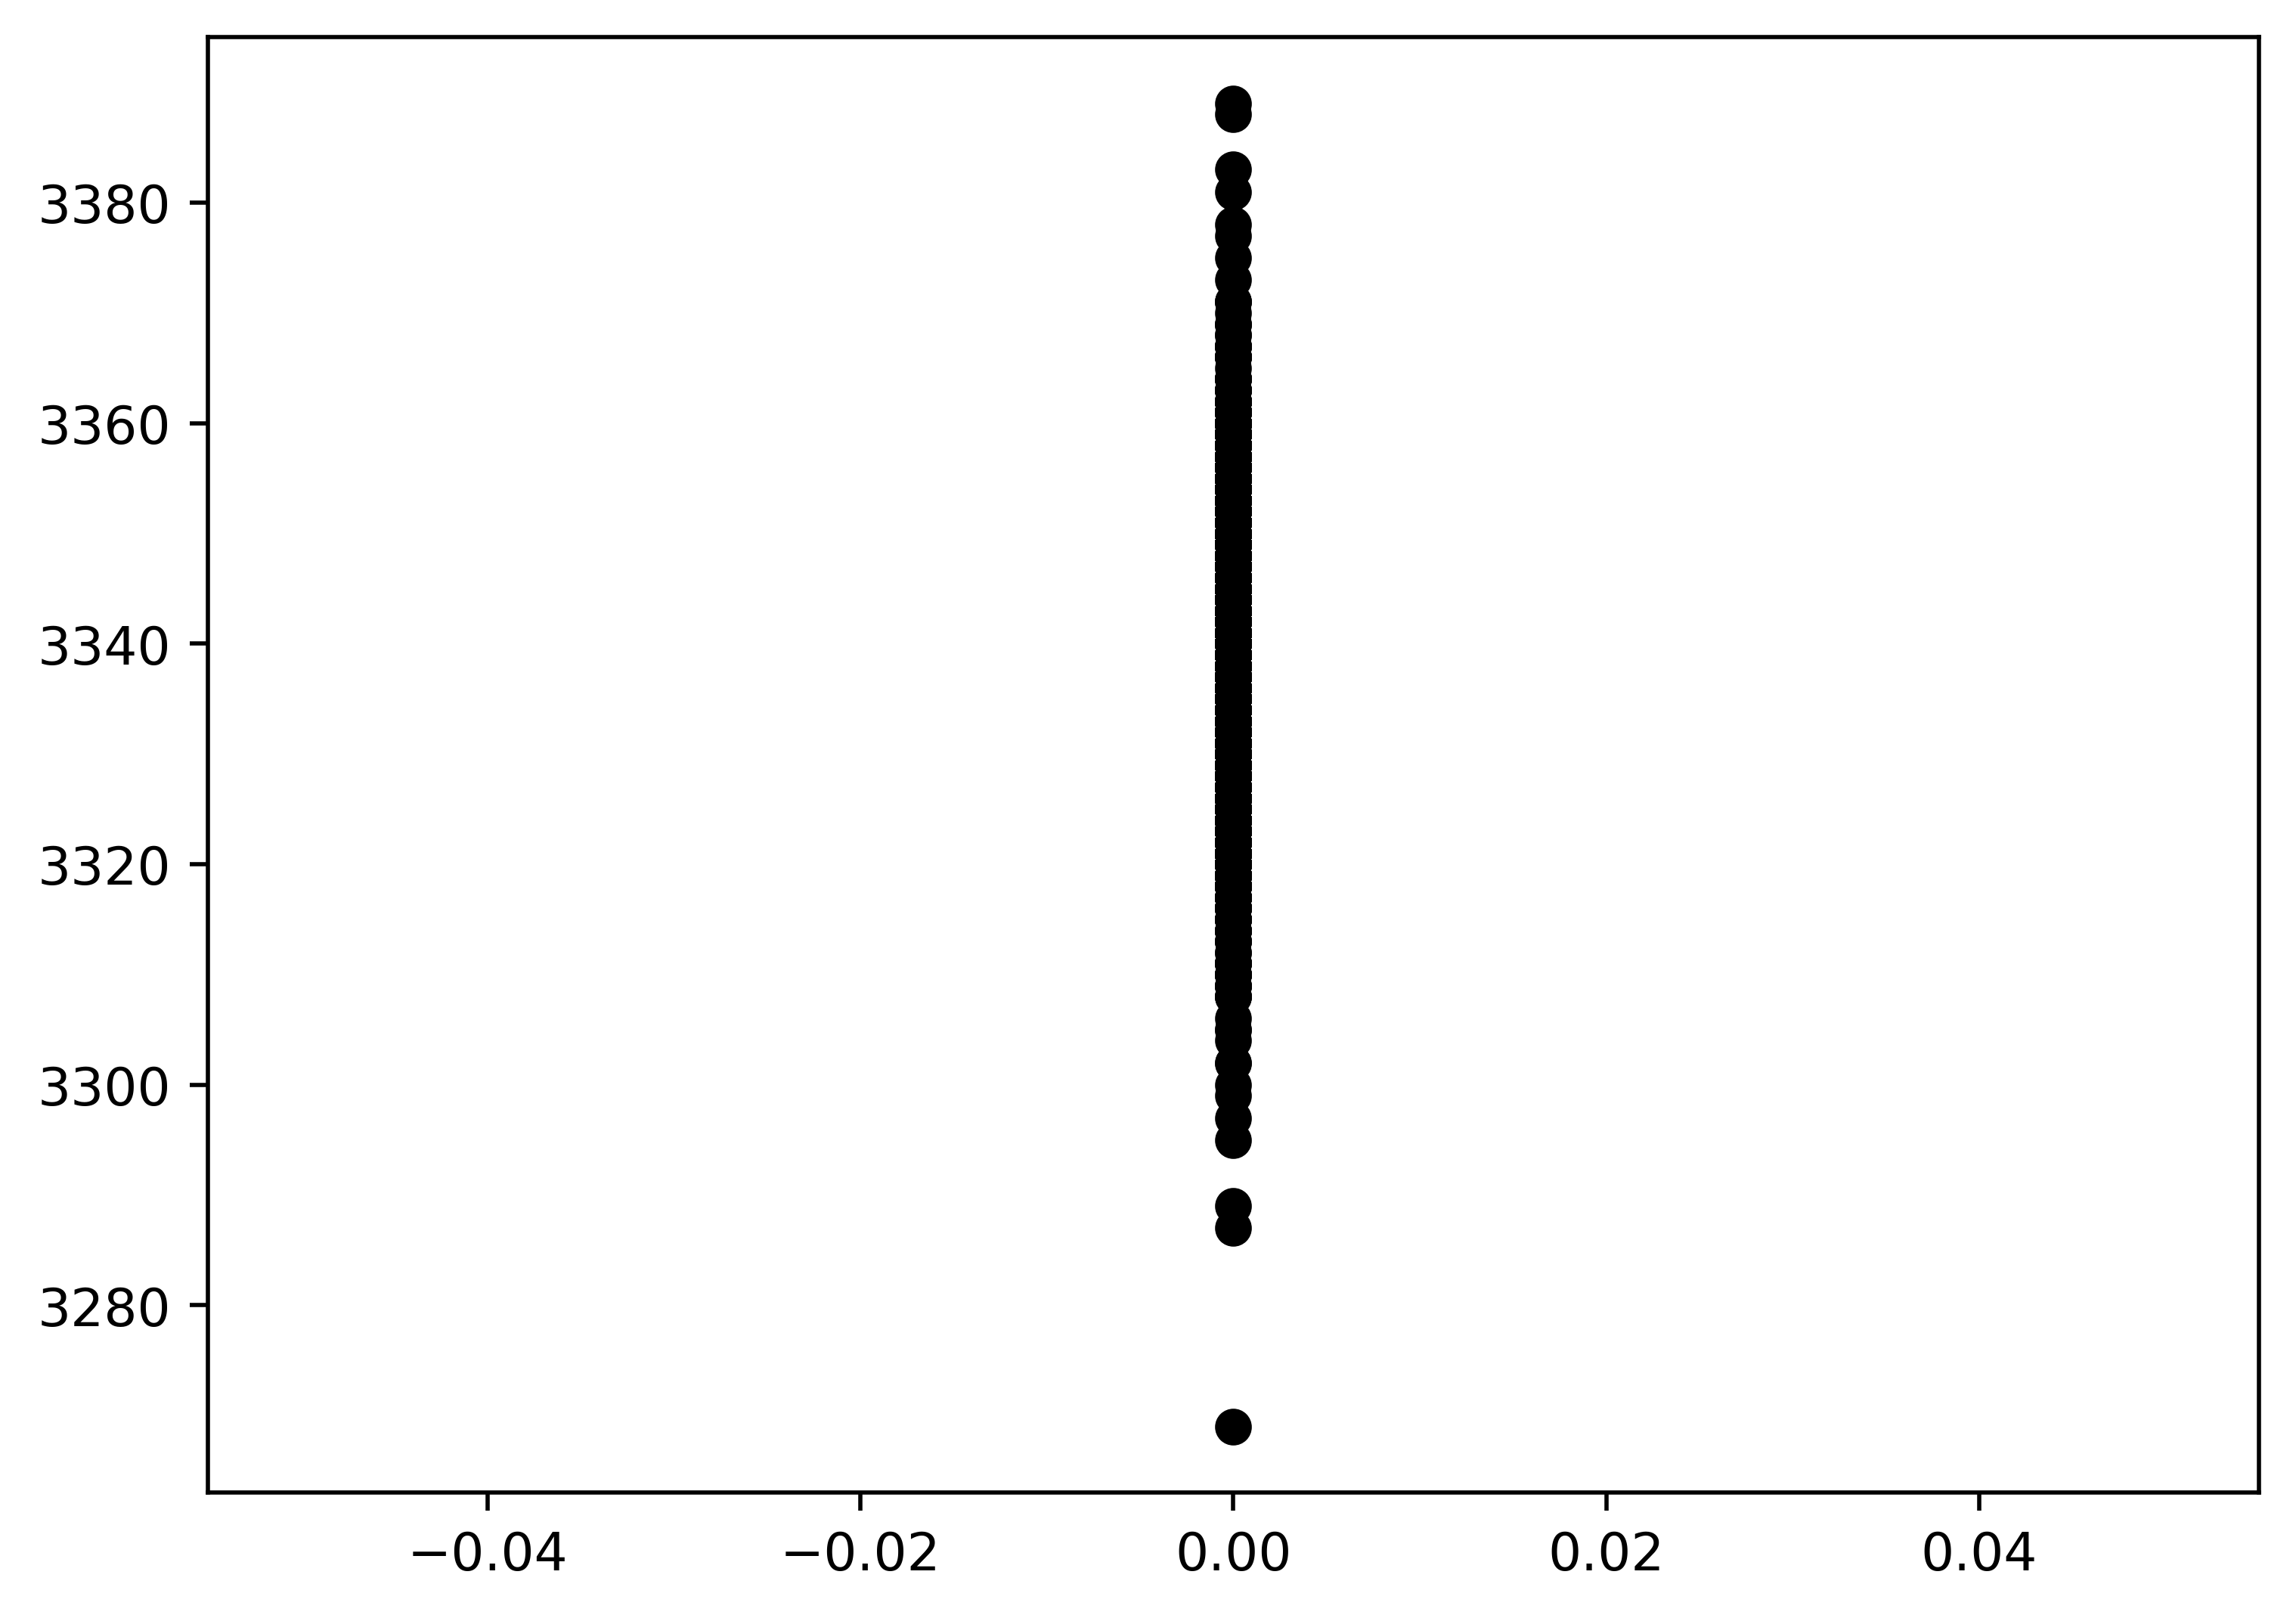

In [171]:
for outlier, col in df_db.values:
    if outlier == -1:
        plt.plot(0, col, 'o', color='red')
    else:
        plt.plot(0, col, 'o', color='black')

### Isolation 

In [143]:
from sklearn.ensemble import IsolationForest

In [154]:
df_isol = df_process_raw[["ocv1_ocv"]]

clf = IsolationForest(n_estimators=50, max_samples=50, contamination=float(0.004),
                    max_features=1.0, bootstrap=False, n_jobs=-1, random_state=None, verbose=0)
# 50개의 노드 수, 최대 50개의 샘플
# 0.04%의 outlier 색출.
clf.fit(df_isol)
pred = clf.predict(df_isol)
df_isol['anomaly']=pred
outliers=df_isol.loc[df_isol['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df_isol['anomaly'].value_counts())

In [150]:
df_isol[df_isol['anomaly'] == -1]

,ocv1_ocv,ocv2_ocv,socv1_ocv,socv2_ocv,socv3_ocv,anomaly
1950,3330,3766,3769.1,3763.8,3762.1,-1
1952,3328,3766,3769.1,3763.9,3762.1,-1
1958,3330,3765,3768.6,3763.4,3761.7,-1
2487,3330,3765,3769.6,3764.4,3762.7,-1
2499,3329,3765,3769.5,3764.3,3762.5,-1
...,...,...,...,...,...,...
43253,3321,3760,3763.0,3757.9,3756.2,-1
43258,3323,3759,3762.4,3757.4,3755.6,-1
43288,3359,3761,3764.1,3759.2,3757.5,-1
43433,3356,3765,3767.8,3763.0,3761.3,-1


Boxplot을 실무 데이터에 적용하기 힘든 이유?  
 - 측정기계와 다양한 요인들로 인하여 변수의 산포가 넓어지기 때문에 제한이 있음  